In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import struct
import sys
import time
from model.FittingTree import *
from model.MET import *
from model.MET_Meta import *
from model.FT_Meta import *

In [2]:
# Real World Data
# 'd' for double, 'l' for uint
datafile = open('./data/latilong_china.double','rb')
data = datafile.read(8)
data_len, = struct.unpack('d', data)
data_len = int(data_len)
data=[]
for i in tqdm(range(data_len)):
    data_bin = datafile.read(8)
    data_unix, = struct.unpack('d',data_bin)
    data.append(data_unix)

100%|██████████| 1785607/1785607 [00:01<00:00, 1257977.41it/s]


In [3]:
epsilon_list = list(range(25,400,25))
FT_Index_seg_num = []
FT_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    epsilon = epsilon_list[i]
    FT_Index = FT(epsilon)
    FT_Index.learn_index(data)
    FT_Index_seg_num.append(FT_Index.seg_num)
    FT_Index_mae.append(FT_Index.mae)
endtime = time.perf_counter()
avg_time = (endtime - starttime) / len(epsilon_list)
avg_time

  4%|▎         | 65454/1785607 [00:00<00:02, 654535.94it/s]

5802 7.0869217022558715


  4%|▎         | 66658/1785607 [00:00<00:02, 666572.69it/s]

3079 15.208218829787294


  4%|▎         | 66796/1785607 [00:00<00:02, 667957.45it/s]

2132 23.388481339958904


  4%|▍         | 67512/1785607 [00:00<00:02, 675115.82it/s]

1689 31.386521782228677


  2%|▏         | 35215/1785607 [00:00<00:04, 352148.66it/s]

1411 39.53424577748631


  2%|▏         | 35605/1785607 [00:00<00:04, 356046.94it/s]

1222 47.81439980914053


  4%|▍         | 67496/1785607 [00:00<00:02, 674959.03it/s]

1081 56.620805698006336


  4%|▎         | 66506/1785607 [00:00<00:02, 665052.71it/s]

973 64.40938515586016


  4%|▎         | 66116/1785607 [00:00<00:02, 661151.17it/s]

895 73.73904392175882


  2%|▏         | 35983/1785607 [00:00<00:04, 359829.49it/s]

824 82.58592680248229


  2%|▏         | 36021/1785607 [00:00<00:04, 360203.47it/s]

756 91.10523144230505


  2%|▏         | 35860/1785607 [00:00<00:04, 358598.63it/s]

696 99.60530900696514


  4%|▍         | 68239/1785607 [00:00<00:02, 682385.77it/s]

653 108.01173326493456


  4%|▎         | 65174/1785607 [00:00<00:02, 644799.61it/s]

614 115.0680536086608


100%|██████████| 1785607/1785607 [00:02<00:00, 706795.06it/s]

577 123.95975094183659


2.5634431573251883

In [4]:
epsilon_list = list(range(25,400,25))
FT_Meta_Index_seg_num_withBound = []
FT_Meta_Index_mae_withBound = []
FT_Meta_Index_mean_epsilon=[]
FT_Meta_Index_mean_seg_err=[]
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    FT_Meta_Index = FT_Meta(epsilon_list[i],init_epsilon=range(25,400,50),low=1,high=1000,withBound=True)
    FT_Meta_Index.learn_index_lookahead(data,lookn=0.4)
    FT_Meta_Index_seg_num_withBound.append(FT_Meta_Index.seg_num)
    FT_Meta_Index_mae_withBound.append(FT_Meta_Index.mae)
endtime = time.perf_counter()
avg_time = (endtime - starttime) / len(epsilon_list)
avg_time

  3%|▎         | 57344/1785607 [00:00<00:03, 573436.45it/s]

5867 6.786078347587123


  2%|▏         | 32526/1785607 [00:00<00:05, 324978.28it/s]

3029 14.658408037154873


  3%|▎         | 47639/1785607 [00:00<00:03, 476384.78it/s]

2118 22.611009029422487


  3%|▎         | 59293/1785607 [00:00<00:02, 592929.15it/s]

1624 30.466093602903662


  2%|▏         | 33964/1785607 [00:00<00:05, 339637.89it/s]

1352 38.681964172407476


  4%|▎         | 63572/1785607 [00:00<00:02, 634373.00it/s]

1166 46.644856342969085


  3%|▎         | 62472/1785607 [00:00<00:02, 624719.11it/s]

1041 54.91435685455982


  4%|▎         | 63990/1785607 [00:00<00:02, 639894.51it/s]

931 63.354634586445954


  2%|▏         | 34451/1785607 [00:00<00:05, 344506.22it/s]

848 70.99477712620974


  2%|▏         | 42167/1785607 [00:00<00:04, 421664.37it/s]

786 79.34701308854636


  4%|▎         | 65135/1785607 [00:00<00:02, 648587.29it/s]

727 88.24361743653559


  4%|▎         | 64189/1785607 [00:00<00:02, 641882.96it/s]

682 95.1648218224951


  2%|▏         | 43143/1785607 [00:00<00:04, 431422.18it/s]

637 104.03466272253637


  4%|▎         | 65086/1785607 [00:00<00:02, 648337.94it/s]

604 112.38230976917093


100%|██████████| 1785607/1785607 [00:02<00:00, 711510.22it/s]

566 120.22568403909708


2.821858442823092

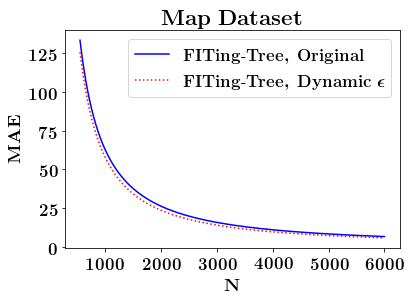

In [8]:
x = np.arange(550,6000)
import matplotlib.pylab as pylab
label_size = 18.5
ticks_size = 17
title_size = 22.5
legend_size = 17
params = {'legend.fontsize': legend_size,
          'axes.labelsize': label_size,
          'axes.titlesize': title_size,
          'xtick.labelsize': ticks_size,
          'ytick.labelsize': ticks_size}
pylab.rcParams.update(params)
plt.rcParams["text.usetex"] = True
plt.rcParams['text.latex.preamble'] = [r'\boldmath']
markers = ["v", "^", "o", "<", ">", "1", "2", "3", "4"]
colors = ["b", "r", "g", "purple", "teal", "tomato", "olive", "deeppink"]
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10))]

plt.title('$\mathrm{Map~Dataset}$')
plt.xlabel('$\mathrm{N}$')
plt.ylabel('$\mathrm{MAE}$')
plt.xticks()
plt.yticks()
def func(x,a,b):
    return a * x**b
p1,_ = curve_fit(func,FT_Index_seg_num,FT_Index_mae)
p2,_ = curve_fit(func,FT_Meta_Index_seg_num_withBound,FT_Meta_Index_mae_withBound)
#p3,_ = curve_fit(func,PGM_Index_seg_num,PGM_Index_mae)
#p4,_ = curve_fit(func,FT_Meta_Index_seg_num_withBound,FT_Meta_Index_mae_withBound)
plt.plot(x,p1[0]*x**p1[1],c=colors[0], linestyle=linestyles[0], label='$\mathrm{FITing\mbox{-}Tree,~Original}$')
#plt.scatter(FT_Index_seg_num, FT_Index_mae,c=colors[0],marker=markers[0])
plt.plot(x,p2[0]*x**p2[1],c=colors[1], linestyle=linestyles[1], label='$\mathrm{FITing\mbox{-}Tree,~Dynamic~\epsilon}$')
#plt.scatter(FT_Meta_Index_seg_num_withBound, FT_Meta_Index_mae_withBound,c=colors[1],marker=markers[1])
plt.legend()
#plt.savefig("{}.pdf".format("results/FITingTree/Map_tradeoff_30"), bbox_inches='tight', pad_inches=0)

In [13]:
def calc_AUC(x,y):
    area=0
    for i in range(len(x)-1):
        area += (y[i]+y[i+1])*(x[i+1]-x[i]) / 2 
    return area
AUC1 = calc_AUC(x,p1[0]*x**p1[1])
AUC2 = calc_AUC(x,p2[0]*x**p2[1])
#AUC3 = calc_AUC(x,p3[0]*x**p3[1])
AUC1,AUC2,1-AUC2/AUC1

(130469.7873587642, 118347.02031247623, 0.09291627810316672)

In [13]:
FT_Random_Index_seg_num = []
FT_Random_Index_mae = []
starttime = time.perf_counter()
epsilon_high_list = list(range(50,700,100))
for i in range(len(epsilon_high_list)):
    FT_Random_Index = FT_Random(epsilon_list[i],init_epsilon=range(25,400,25),low=1,high=epsilon_high_list[i],withBound=True)
    FT_Random_Index.learn_index_lookahead(data,lookn=400)
    FT_Random_Index_seg_num.append(FT_Random_Index.seg_num)
    FT_Random_Index_mae.append(FT_Random_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

  2%|▏         | 36416/1785607 [00:00<00:04, 364156.87it/s]

6003 9.796220556931061


  2%|▏         | 34038/1785607 [00:00<00:05, 337941.42it/s]

2272 30.54900938448382


  2%|▏         | 27910/1785607 [00:00<00:06, 278875.53it/s]

1500 51.79510665000753


  1%|          | 18583/1785607 [00:00<00:09, 185829.29it/s]

1127 72.9901070056289


  0%|          | 0/1785607 [00:00<?, ?it/s]

903 94.65929457041779


  2%|▏         | 29404/1785607 [00:00<00:06, 290304.79it/s]

748 116.285399866824


100%|██████████| 1785607/1785607 [00:03<00:00, 451203.18it/s]

652 138.7725977776745


-2.442757997661829

In [11]:
FT_Poly_Index_seg_num = []
FT_Poly_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    FT_Poly_Index = FT_Poly(epsilon_list[i],init_epsilon=range(25,400,50),low=1,high=1000,withBound=True)
    FT_Poly_Index.learn_index_lookahead(data)
    FT_Poly_Index_seg_num.append(FT_Poly_Index.seg_num)
    FT_Poly_Index_mae.append(FT_Poly_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

  2%|▏         | 28011/1785607 [00:00<00:06, 280108.26it/s]

4864 9.143576386069276


  2%|▏         | 30754/1785607 [00:00<00:05, 303589.71it/s]

2703 17.905731776365123


  2%|▏         | 33309/1785607 [00:00<00:05, 329195.82it/s]

2139 23.84101316807114


  2%|▏         | 34615/1785607 [00:00<00:05, 343177.81it/s]

1818 28.626759415705695


  2%|▏         | 36207/1785607 [00:00<00:04, 360714.97it/s]

1602 33.739578753891536


  0%|          | 0/1785607 [00:00<?, ?it/s]

1446 38.227494067843594


  2%|▏         | 39545/1785607 [00:00<00:04, 391033.16it/s]

1338 42.55023025783389


  0%|          | 0/1785607 [00:00<?, ?it/s]

1231 47.88006095406212


  2%|▏         | 37047/1785607 [00:00<00:04, 370468.59it/s]

1135 52.258480169488585


  0%|          | 0/1785607 [00:00<?, ?it/s]

1032 60.06615061432891


  0%|          | 0/1785607 [00:00<?, ?it/s]

985 64.4929466562351


  0%|          | 0/1785607 [00:00<?, ?it/s]

942 69.17261301058967


  0%|          | 0/1785607 [00:00<?, ?it/s]


885 74.4421504844011


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

In [12]:
FT_LS_Index_seg_num = []
FT_LS_Index_mae = []
starttime = time.perf_counter()
for i in range(len(epsilon_list)):
    FT_LS_Index = FT_LS(epsilon_list[i],init_epsilon=range(25,400,50),low=1,high=1000,withBound=True)
    FT_LS_Index.learn_index_lookahead(data)
    FT_LS_Index_seg_num.append(FT_LS_Index.seg_num)
    FT_LS_Index_mae.append(FT_LS_Index.mae)
endtime = time.perf_counter()
avg_time = (starttime - endtime) / len(epsilon_list)
avg_time

  0%|          | 3327/1785607 [00:00<00:55, 32394.05it/s]

7984 4.99640738415564


  0%|          | 8504/1785607 [00:00<00:22, 77990.05it/s]

3964 10.812014065805073


  1%|          | 14825/1785607 [00:00<00:12, 143893.84it/s]

2760 16.555225197929893


  1%|          | 14203/1785607 [00:00<00:12, 141273.30it/s]

2187 21.965854188519646


  1%|          | 17922/1785607 [00:00<00:10, 172910.66it/s]

1783 27.827870858481177


  0%|          | 0/1785607 [00:00<?, ?it/s]

1582 32.83225592193579


  1%|          | 12730/1785607 [00:00<00:14, 126159.53it/s]

1383 37.95469887830861


  1%|          | 14916/1785607 [00:00<00:12, 140339.21it/s]

1247 43.82831776533134


  0%|          | 0/1785607 [00:00<?, ?it/s]

1128 49.41623548742808


  1%|          | 15193/1785607 [00:00<00:11, 148496.63it/s]

976 60.063291642561886


  1%|          | 17884/1785607 [00:00<00:09, 178837.61it/s]

973 60.49896197763562


  0%|          | 0/1785607 [00:00<?, ?it/s]

803 76.68293919098659


  1%|          | 16545/1785607 [00:00<00:10, 165448.97it/s]

755 82.32576149175043


  0%|          | 0/1785607 [00:00<?, ?it/s]

709 89.57723172008174


100%|██████████| 1785607/1785607 [00:16<00:00, 110318.98it/s]

705 90.87463198788983


-75.32615464453896

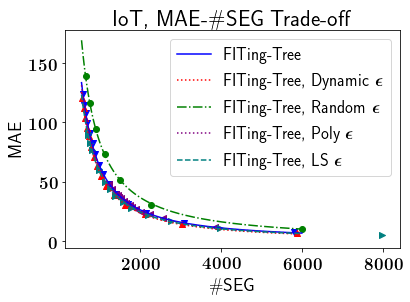

In [14]:
plt.rcParams["text.usetex"] = True
markers = ["v", "^", "o", "<", ">", "1", "2", "3", "4"]
colors = ["b", "r", "g", "purple", "teal", "tomato", "olive", "deeppink"]
linestyles = ['solid', 'dotted', '-.', ':', "--", (0, (3, 10, 1, 10)), (0, (3, 5, 1, 5, 1, 5)),
              (0, (5, 10))]

plt.title('IoT, MAE-\#SEG Trade-off')
plt.xlabel('\#SEG')
plt.ylabel('MAE')
x = np.arange(550,6000)
def func(x,a,b):
    return a * x**b
p1,_ = curve_fit(func,FT_Index_seg_num,FT_Index_mae)
p2,_ = curve_fit(func,FT_Meta_Index_seg_num_withBound,FT_Meta_Index_mae_withBound)
p3,_ = curve_fit(func,FT_Random_Index_seg_num,FT_Random_Index_mae)
p4,_ = curve_fit(func,FT_Poly_Index_seg_num,FT_Poly_Index_mae)
p5,_ = curve_fit(func,FT_LS_Index_seg_num,FT_LS_Index_mae)
plt.plot(x,p1[0]*x**p1[1],c=colors[0], linestyle=linestyles[0], label='FITing-Tree')
plt.scatter(FT_Index_seg_num, FT_Index_mae,c=colors[0],marker=markers[0])
plt.plot(x,p2[0]*x**p2[1],c=colors[1], linestyle=linestyles[1], label='FITing-Tree, Dynamic $\epsilon$')
plt.scatter(FT_Meta_Index_seg_num_withBound, FT_Meta_Index_mae_withBound,c=colors[1],marker=markers[1])
plt.plot(x,p3[0]*x**p3[1],c=colors[2], linestyle=linestyles[2], label='FITing-Tree, Random $\epsilon$')
plt.scatter(FT_Random_Index_seg_num, FT_Random_Index_mae,c=colors[2],marker=markers[2])
plt.plot(x,p4[0]*x**p4[1],c=colors[3], linestyle=linestyles[3], label='FITing-Tree, Poly $\epsilon$')
plt.scatter(FT_Poly_Index_seg_num, FT_Poly_Index_mae,c=colors[3],marker=markers[3])
plt.plot(x,p5[0]*x**p5[1],c=colors[4], linestyle=linestyles[4], label='FITing-Tree, LS $\epsilon$')
plt.scatter(FT_LS_Index_seg_num, FT_LS_Index_mae,c=colors[4],marker=markers[4])
plt.legend()

In [17]:
def calc_AUC(x,y):
    area=0
    for i in range(len(x)-1):
        area += (y[i]+y[i+1])*(x[i+1]-x[i]) / 2 
    return area
AUC1 = calc_AUC(x,p1[0]*x**p1[1])
AUC2 = calc_AUC(x,p2[0]*x**p2[1])
AUC3 = calc_AUC(x,p3[0]*x**p3[1])
AUC4 = calc_AUC(x,p4[0]*x**p4[1])
AUC5 = calc_AUC(x,p5[0]*x**p5[1])
AUC_list = [AUC1,AUC2,AUC3,AUC4,AUC5]
for i in range(2,5):
    print(AUC_list[i]/AUC_list[1]-1)

0.517385431115766
0.07287903109246496
0.022043342419989953
